# Predicting Future Tempreture
                                    Chrystalla Havadjia

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_test = pd.read_csv(r'./ps6_test.csv')
df_test.head(10)

,datetime,temperature,humidity,pressure,weather,wind_direction,wind_speed
0,2017-11-20 01:00:00,295.72,26.0,1014.0,sky is clear,270.0,2.0
1,2017-11-20 02:00:00,292.97,30.0,1014.0,light rain,260.0,2.0
2,2017-11-20 03:00:00,290.71,25.0,1016.0,sky is clear,270.0,1.0
3,2017-11-20 04:00:00,290.09,72.0,1016.0,sky is clear,356.0,0.0
4,2017-11-20 05:00:00,289.03,44.0,1016.0,sky is clear,27.0,1.0
5,2017-11-20 06:00:00,287.21,76.0,1016.0,sky is clear,27.0,1.0
6,2017-11-20 07:00:00,286.53,76.0,1016.0,sky is clear,27.0,1.0
7,2017-11-20 08:00:00,285.90,76.0,1016.0,sky is clear,100.0,2.0
8,2017-11-20 09:00:00,285.23,76.0,1016.0,sky is clear,36.0,1.0
9,2017-11-20 10:00:00,284.31,71.0,1016.0,haze,36.0,1.0


In [3]:
df = pd.read_csv(r'./ps6_trainvalid.csv')
df.head(3)

,datetime,temperature,humidity,pressure,weather,wind_direction,wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2,2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.0,0.0


____
# Data Exploration

In [4]:
for column in df:
    print(column, ": ", df[column].isnull().values.any())

datetime :  False
temperature :  True
humidity :  True
pressure :  True
weather :  True
wind_direction :  True
wind_speed :  True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45013 entries, 0 to 45012
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        45013 non-null  object 
 1   temperature     45010 non-null  float64
 2   humidity        44861 non-null  float64
 3   pressure        44761 non-null  float64
 4   weather         45012 non-null  object 
 5   wind_direction  45012 non-null  float64
 6   wind_speed      45012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [6]:
df.describe()

,temperature,humidity,pressure,wind_direction,wind_speed
count,45010.000000,44861.000000,44761.000000,45012.000000,45012.000000
mean,290.841547,62.823767,1015.915127,139.733804,1.220652
std,6.465152,21.786687,11.316175,105.545576,1.435687
min,266.503667,5.000000,886.000000,0.000000,0.000000
25%,286.370000,48.000000,1013.000000,29.000000,0.000000
50%,290.530000,66.000000,1016.000000,140.000000,1.000000
75%,295.080000,81.000000,1021.000000,230.000000,2.000000
max,315.470000,100.000000,1044.000000,360.000000,17.000000


______
# Data Preprocessing
- Convert DateTime 
- Impute missing values for features with missing values
    - Forward feed impute values. This makes sence with time-series data as its most likley that the weather have not drastically changes in an hour
    - Remove first impute since ffill cannot impute it
- One Hot encode Catagorical data
    -  reduce the number of uniqe values in weather column to help with one hot encoding

In [7]:
#fill forward - this makes sence with time series data
df.ffill(inplace = True)
#Drop fist line of missing values
df.dropna(inplace= True)
df.head(3)

,datetime,temperature,humidity,pressure,weather,wind_direction,wind_speed
1,2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2,2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.0,0.0
3,2012-10-01 15:00:00,291.862844,88.0,1013.0,sky is clear,0.0,0.0


In [8]:
for column in df:
    print(column, ": ", df[column].isnull().values.any())

datetime :  False
temperature :  False
humidity :  False
pressure :  False
weather :  False
wind_direction :  False
wind_speed :  False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45012 entries, 1 to 45012
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        45012 non-null  object 
 1   temperature     45012 non-null  float64
 2   humidity        45012 non-null  float64
 3   pressure        45012 non-null  float64
 4   weather         45012 non-null  object 
 5   wind_direction  45012 non-null  float64
 6   wind_speed      45012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.7+ MB


In [10]:
# One Hot Encode weather
df['weather'].unique()

array(['mist', 'sky is clear', 'fog', 'haze', 'few clouds',
       'overcast clouds', 'scattered clouds', 'broken clouds',
       'light rain', 'thunderstorm with rain', 'moderate rain',
       'thunderstorm', 'shower rain', 'smoke', 'drizzle',
       'light intensity drizzle', 'heavy intensity rain',
       'light intensity shower rain', 'very heavy rain',
       'thunderstorm with light rain', 'proximity thunderstorm',
       'thunderstorm with heavy rain', 'squalls', 'dust',
       'proximity shower rain'], dtype=object)

In [11]:
# reduce the number of uniqe values in weather column to help with one hot encoding

replace_clouds = ['few clouds', 'overcast clouds', 'scattered clouds', 'broken clouds']
replace_rain = ['light rain', 'moderate rain', 'shower rain','heavy intensity rain',
                'light intensity shower rain', 'very heavy rain','proximity shower rain']
replace_thund = ['thunderstorm with rain','thunderstorm with light rain', 'proximity thunderstorm',
       'thunderstorm with heavy rain']
replace_unclear = ['mist','fog']
replace_dust = ['smoke','haze','dust']
replace_drizzle = ['drizzle','light intensity drizzle']

df.replace(to_replace = replace_clouds , value= 'clouds', inplace=True)
df.replace(to_replace = replace_rain , value= 'rain', inplace=True)
df.replace(to_replace = replace_thund , value= 'thunder', inplace=True)
df.replace(to_replace = replace_unclear , value= 'fog/mist', inplace=True)
df.replace(to_replace = replace_dust , value= 'dust', inplace=True)
df.replace(to_replace = replace_drizzle , value= 'drizzle', inplace=True)

df_test.replace(to_replace = replace_clouds , value= 'clouds', inplace=True)
df_test.replace(to_replace = replace_rain , value= 'rain', inplace=True)
df_test.replace(to_replace = replace_thund , value= 'thunder', inplace=True)
df_test.replace(to_replace = replace_unclear , value= 'fog/mist', inplace=True)
df_test.replace(to_replace = replace_dust , value= 'dust', inplace=True)
df_test.replace(to_replace = replace_drizzle , value= 'drizzle', inplace=True)


In [12]:
df['weather'].unique()

array(['fog/mist', 'sky is clear', 'dust', 'clouds', 'rain', 'thunder',
       'thunderstorm', 'drizzle', 'squalls'], dtype=object)

In [13]:
#function for creating dummy variables
def get_dummies(df,col_name):

    """Method to one hot encode categorical data

      Returns one hot encoded dataframe
    """

    dummies_cols = pd.get_dummies(df[col_name]).columns
    df[dummies_cols] = pd.get_dummies(df[col_name])

    return df

In [14]:
df = get_dummies(df, 'weather')
del df['weather']

df_test = get_dummies(df_test, 'weather')
del df_test['weather']

In [15]:
#subsample data into day intervals
days = df[0::24].copy()
#days

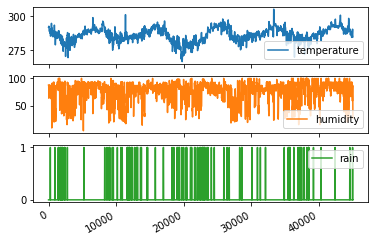

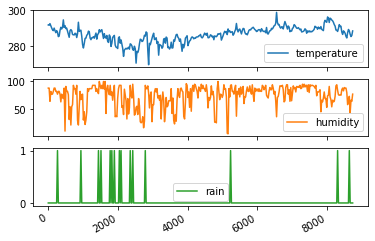

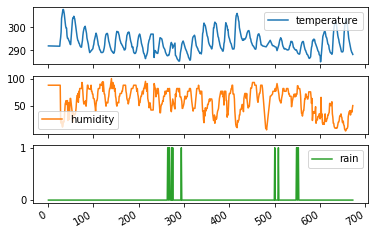

In [16]:
plot_cols = ['temperature', 'humidity','rain']
plot_features = days[plot_cols]
#plot_features.index = days
_ = plot_features.plot(subplots=True)

plot_features = days[plot_cols][:365]
#plot_features.index = days[:365]
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:672] #hours in a month 672
#plot_features.index = days[:365]
_ = plot_features.plot(subplots=True)

### Split and Normalize the Data
- Scaling data for Neural Networks

In [17]:
#ensure that date time is in time stamp form

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]


#num_features = df.shape[1]

#df["datetime"] = pd.to_datetime(df["datetime"])

In [18]:
del train_df['datetime']
del val_df['datetime']

temp_test = df_test.copy()
del temp_test['datetime']

train_mean = train_df.mean()
train_std = train_df.std()


train_df = (train_df - train_mean) /(train_std)
val_df = (val_df - train_mean) /(train_std)
test_df = (temp_test - train_mean) / train_std

train_X = train_df.copy()
val_X = val_df.copy()
test_X = test_df.copy()

y_train = train_X['temperature']
y_val = val_X['temperature']
y_test = test_X['temperature']

del train_X['temperature']
del val_X['temperature']
del test_X['temperature']



In [19]:
num_features = train_df.shape[1]
print(num_features)

14


In [20]:
print(type(y_train))
print(y_train.values)

<class 'pandas.core.series.Series'>
[ 0.26627944  0.26599875  0.26517252 ... -0.43139057 -0.50873758
 -0.5288478 ]


_______
# Baseline Model
- Baseline models are used to help show that the trained model is preforming well, better than a basiline model
- Predict everything as mean temperature

In [21]:
import tensorflow as tf
from tensorflow import keras

# Predict everything as mean temperature
y_pred = y_val.mean()


baseline_MSE = np.mean(keras.losses.mean_squared_error(y_val, y_pred))
baseline_MAE = np.mean(keras.losses.mean_absolute_error(y_val, y_pred))
                  
print("MSE: ", baseline_MSE)
print("MAE: ", baseline_MAE)


MSE:  0.97717696
MAE:  0.788477


## Window

In [22]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [23]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

### Convert dataset to tf.data.Dataset

In [24]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
              data=data,
              targets=None,
              sequence_length=self.total_window_size,
              sequence_stride=1,
              shuffle=True,
              batch_size=10,)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [25]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    result = getattr(self, '_example', None)
    if result is None:
        result = next(iter(self.train))
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

### Defining Different Time Step Models

In [26]:
#predicts 24 hours into the future
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['temperature'])
#w1

In [27]:
# #define single step model to predict one hour in the future
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['temperature'])

#single_step_window

In [28]:
CONV_WIDTH = 240  # 240 hour inputs/ 10 days of inputs
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=24, # 1 day lables
    shift=240,
    label_columns=['temperature'])

#conv_window

________
# Linear Model - Simple model

In [29]:
MAX_EPOCHS = 20
val_performance = {}
performance = {}


def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [30]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

### Singel step Linear Model

In [31]:
history = compile_and_fit(linear, single_step_window)

Epoch 1/20
3151/3151 [==============================] - 8s 2ms/step - loss: 1.0917 - mean_absolute_error: 0.4233 - val_loss: 0.6174 - val_mean_absolute_error: 0.1818
Epoch 2/20
3151/3151 [==============================] - 7s 2ms/step - loss: 0.4303 - mean_absolute_error: 0.1966 - val_loss: 0.3548 - val_mean_absolute_error: 0.1708
Epoch 3/20
3151/3151 [==============================] - 7s 2ms/step - loss: 0.2224 - mean_absolute_error: 0.1885 - val_loss: 0.2363 - val_mean_absolute_error: 0.1649
Epoch 4/20
3151/3151 [==============================] - 7s 2ms/step - loss: 0.1294 - mean_absolute_error: 0.1827 - val_loss: 0.1743 - val_mean_absolute_error: 0.1616
Epoch 5/20
3151/3151 [==============================] - 7s 2ms/step - loss: 0.0988 - mean_absolute_error: 0.1797 - val_loss: 0.1293 - val_mean_absolute_error: 0.1599
Epoch 6/20
3151/3151 [==============================] - 7s 2ms/step - loss: 0.0855 - mean_absolute_error: 0.1793 - val_loss: 0.0961 - val_mean_absolute_error: 0.1598
Epoc

In [52]:
print(linear.evaluate(single_step_window.val))

901/901 [==============================] - 2s 2ms/step - loss: 0.3473 - mean_absolute_error: 0.4677
[0.3473319709300995, 0.4677097499370575]


In [32]:
history = compile_and_fit(linear, w1)

val_performance['Linear'] = linear.evaluate(w1.val)
performance['Linear'] = linear.evaluate(w1.test, verbose=0)

Epoch 1/20
3147/3147 [==============================] - 8s 2ms/step - loss: 0.7010 - mean_absolute_error: 0.6642 - val_loss: 0.7074 - val_mean_absolute_error: 0.6659
Epoch 2/20
3147/3147 [==============================] - 7s 2ms/step - loss: 0.6632 - mean_absolute_error: 0.6506 - val_loss: 0.7078 - val_mean_absolute_error: 0.6657
Epoch 3/20
3147/3147 [==============================] - 9s 3ms/step - loss: 0.6634 - mean_absolute_error: 0.6508 - val_loss: 0.7067 - val_mean_absolute_error: 0.6651
Epoch 4/20
3147/3147 [==============================] - 8s 2ms/step - loss: 0.6637 - mean_absolute_error: 0.6509 - val_loss: 0.7074 - val_mean_absolute_error: 0.6654
Epoch 5/20
896/896 [==============================] - 2s 2ms/step - loss: 0.7067 - mean_absolute_error: 0.6653


### Feature Importance for Linear Model

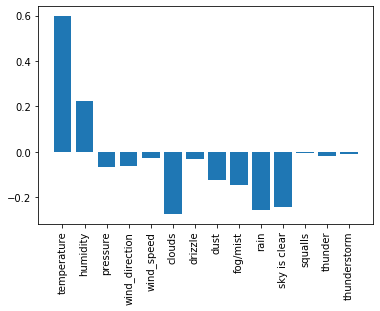

In [33]:
import matplotlib.pyplot as plt

plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

_______
# Train LSTM - RNN Model

In [34]:
# can be trained on 24h data at a time
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(10, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

In [35]:
history = compile_and_fit(lstm_model, w1)

val_performance['LSTM'] = lstm_model.evaluate(w1.val)
performance['LSTM'] = lstm_model.evaluate(w1.test, verbose=0)

Epoch 1/20
3147/3147 [==============================] - 46s 14ms/step - loss: 0.6409 - mean_absolute_error: 0.6328 - val_loss: 0.4529 - val_mean_absolute_error: 0.5108
Epoch 2/20
3147/3147 [==============================] - 40s 13ms/step - loss: 0.3323 - mean_absolute_error: 0.4460 - val_loss: 0.4163 - val_mean_absolute_error: 0.4864
Epoch 3/20
3147/3147 [==============================] - 38s 12ms/step - loss: 0.2810 - mean_absolute_error: 0.4084 - val_loss: 0.3988 - val_mean_absolute_error: 0.4720
Epoch 4/20
3147/3147 [==============================] - 38s 12ms/step - loss: 0.2592 - mean_absolute_error: 0.3917 - val_loss: 0.3863 - val_mean_absolute_error: 0.4646
Epoch 5/20
3147/3147 [==============================] - 42s 13ms/step - loss: 0.2493 - mean_absolute_error: 0.3835 - val_loss: 0.3599 - val_mean_absolute_error: 0.4460
Epoch 6/20
3147/3147 [==============================] - 43s 14ms/step - loss: 0.2410 - mean_absolute_error: 0.3764 - val_loss: 0.3359 - val_mean_absolute_error:

________
# Train Simple RNN Model

In [36]:
simpleRNN_model = keras.models.Sequential([
  keras.layers.SimpleRNN(1)])

history = compile_and_fit(simpleRNN_model, w1)

val_performance['RNN'] = simpleRNN_model.evaluate(w1.val)
performance['RNN'] = simpleRNN_model.evaluate(w1.test, verbose=0)

Epoch 1/20
3147/3147 [==============================] - 25s 8ms/step - loss: 0.7103 - mean_absolute_error: 0.6347 - val_loss: 0.2733 - val_mean_absolute_error: 0.3596
Epoch 2/20
3147/3147 [==============================] - 20s 6ms/step - loss: 0.2396 - mean_absolute_error: 0.3489 - val_loss: 0.2743 - val_mean_absolute_error: 0.3617
Epoch 3/20
896/896 [==============================] - 3s 3ms/step - loss: 0.2741 - mean_absolute_error: 0.3615


In [37]:
val_performance['Baseline'] = [0.977 , 0.788]

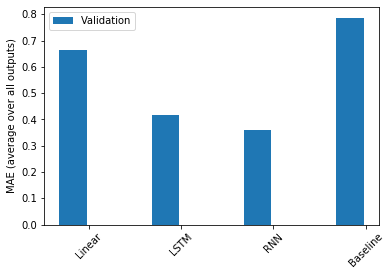

In [38]:
x = np.arange(len(val_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
#test_mae = [v[metric_index] for v in performance.values()]


plt.bar(x - 0.17, val_mae, width, label='Validation')
#plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=val_performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [45]:
print(val_performance)

{'Linear': [0.7067275643348694, 0.6652976870536804], 'LSTM': [0.31899532675743103, 0.41820478439331055], 'RNN': [0.27414488792419434, 0.36152902245521545], 'Baseline': [0.977, 0.788]}


## Multi - Window Analysis - predict 24 hours in future

In [47]:
OUT_STEPS = 24 # predict 24 hours ahead
multi_window = WindowGenerator(input_width=24, #use 24 hours to predict next 24 hours
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                              label_columns=['temperature'])

multi_window

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): ['temperature']

In [48]:
multi_val_performance ={}

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

history = compile_and_fit(conv_model, conv_window)

multi_val_performance['conv'] = conv_model.evaluate(conv_window.val)

Epoch 1/20
3103/3103 [==============================] - 12s 4ms/step - loss: 0.9602 - mean_absolute_error: 0.7130 - val_loss: 0.8489 - val_mean_absolute_error: 0.7407
Epoch 2/20
3103/3103 [==============================] - 12s 4ms/step - loss: 0.5484 - mean_absolute_error: 0.5995 - val_loss: 0.8374 - val_mean_absolute_error: 0.7372
Epoch 3/20
3103/3103 [==============================] - 12s 4ms/step - loss: 0.5032 - mean_absolute_error: 0.5798 - val_loss: 0.8393 - val_mean_absolute_error: 0.7190
Epoch 4/20
853/853 [==============================] - 2s 3ms/step - loss: 0.8780 - mean_absolute_error: 0.7402


In [49]:
multi_lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(10, return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)


multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)


Epoch 1/20
3147/3147 [==============================] - 46s 14ms/step - loss: 0.4231 - mean_absolute_error: 0.4864 - val_loss: 0.2382 - val_mean_absolute_error: 0.3436
Epoch 2/20
3147/3147 [==============================] - 41s 13ms/step - loss: 0.1304 - mean_absolute_error: 0.2711 - val_loss: 0.1999 - val_mean_absolute_error: 0.3134
Epoch 3/20
3147/3147 [==============================] - 42s 13ms/step - loss: 0.1183 - mean_absolute_error: 0.2563 - val_loss: 0.1859 - val_mean_absolute_error: 0.2985
Epoch 4/20
3147/3147 [==============================] - 39s 12ms/step - loss: 0.1117 - mean_absolute_error: 0.2475 - val_loss: 0.1826 - val_mean_absolute_error: 0.2932
Epoch 5/20
3147/3147 [==============================] - 41s 13ms/step - loss: 0.1083 - mean_absolute_error: 0.2430 - val_loss: 0.1827 - val_mean_absolute_error: 0.2901
Epoch 6/20
896/896 [==============================] - 3s 3ms/step - loss: 0.1837 - mean_absolute_error: 0.2910


In [55]:
history = compile_and_fit(simpleRNN_model, multi_window)

multi_val_performance['RNN'] = simpleRNN_model.evaluate(multi_window.val)

Epoch 1/20
3147/3147 [==============================] - 20s 6ms/step - loss: 0.6125 - mean_absolute_error: 0.6246 - val_loss: 0.6889 - val_mean_absolute_error: 0.6429
Epoch 2/20
3147/3147 [==============================] - 17s 5ms/step - loss: 0.6077 - mean_absolute_error: 0.6224 - val_loss: 0.6312 - val_mean_absolute_error: 0.6212
Epoch 3/20
3147/3147 [==============================] - 17s 5ms/step - loss: 0.5782 - mean_absolute_error: 0.6111 - val_loss: 0.6012 - val_mean_absolute_error: 0.6046
Epoch 4/20
3147/3147 [==============================] - 17s 5ms/step - loss: 0.5718 - mean_absolute_error: 0.6090 - val_loss: 0.5976 - val_mean_absolute_error: 0.6047
Epoch 5/20
3147/3147 [==============================] - 18s 6ms/step - loss: 0.5723 - mean_absolute_error: 0.6093 - val_loss: 0.5992 - val_mean_absolute_error: 0.6075
Epoch 6/20
896/896 [==============================] - 3s 3ms/step - loss: 0.5980 - mean_absolute_error: 0.6029


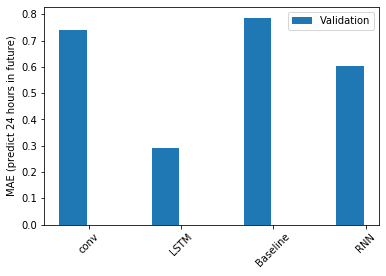

In [56]:
multi_val_performance['Baseline'] = [0.977 , 0.788]

x = np.arange(len(multi_val_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.xticks(ticks=x, labels=multi_val_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (predict 24 hours in future)')
_ = plt.legend()

In [57]:
print(multi_val_performance)

{'conv': [0.8780413269996643, 0.7401525378227234], 'LSTM': [0.18374870717525482, 0.2909727394580841], 'Baseline': [0.977, 0.788], 'RNN': [0.5979623198509216, 0.6029170751571655]}


## LSTM has best MES scores and is the selected model
### Using LSTM Model test how long into the future it can predict

In [83]:
OUT_STEPS = 24 # predict X hours ahead
test_window = WindowGenerator(input_width=120, #use X hours to predict next X hours
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                              label_columns=['temperature'])


In [84]:
history = compile_and_fit(multi_lstm_model, test_window)

print(multi_lstm_model.evaluate(test_window.val))

Epoch 1/20
3137/3137 [==============================] - 179s 56ms/step - loss: 0.1007 - mean_absolute_error: 0.2332 - val_loss: 0.1840 - val_mean_absolute_error: 0.2896
Epoch 2/20
3137/3137 [==============================] - 169s 54ms/step - loss: 0.1001 - mean_absolute_error: 0.2323 - val_loss: 0.1861 - val_mean_absolute_error: 0.2907
Epoch 3/20
886/886 [==============================] - 9s 11ms/step - loss: 0.1896 - mean_absolute_error: 0.2914
[0.18958894908428192, 0.29140129685401917]


In [101]:
OUT_STEPS = 24 # predict X hours ahead
test_window = WindowGenerator(input_width=240, #use X hours to predict next X hours
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                              label_columns=['temperature'])

In [102]:
history = compile_and_fit(multi_lstm_model, test_window)

print(multi_lstm_model.evaluate(test_window.val))

Epoch 1/20
3125/3125 [==============================] - 332s 106ms/step - loss: 0.0976 - mean_absolute_error: 0.2310 - val_loss: 0.1995 - val_mean_absolute_error: 0.2982
Epoch 2/20
3125/3125 [==============================] - 325s 104ms/step - loss: 0.0969 - mean_absolute_error: 0.2300 - val_loss: 0.2021 - val_mean_absolute_error: 0.2997
Epoch 3/20
874/874 [==============================] - 17s 20ms/step - loss: 0.2057 - mean_absolute_error: 0.3049
[0.2057262361049652, 0.30488619208335876]


In [114]:
OUT_STEPS = 48 # predict X hours ahead
test_window = WindowGenerator(input_width = 480, #use X hours to predict next X hours
                               label_width=1,
                               shift=480,
                              label_columns=['temperature'])

In [115]:
history = compile_and_fit(multi_lstm_model, test_window)

print(multi_lstm_model.evaluate(test_window.val))

Epoch 1/20
3055/3055 [==============================] - 624s 203ms/step - loss: 0.4736 - mean_absolute_error: 0.5282 - val_loss: 0.4442 - val_mean_absolute_error: 0.5150
Epoch 2/20
3055/3055 [==============================] - 614s 201ms/step - loss: 0.3288 - mean_absolute_error: 0.4431 - val_loss: 0.4440 - val_mean_absolute_error: 0.5155
Epoch 3/20
3055/3055 [==============================] - 614s 201ms/step - loss: 0.3169 - mean_absolute_error: 0.4332 - val_loss: 0.4507 - val_mean_absolute_error: 0.5220
Epoch 4/20
805/805 [==============================] - 30s 37ms/step - loss: 0.4748 - mean_absolute_error: 0.5313
[0.4748210906982422, 0.5312662720680237]


In [116]:
test_window = WindowGenerator(input_width = 480, #use X hours to predict next X hours
                               label_width=1,
                               shift=24,
                              label_columns=['temperature'])

In [117]:
history = compile_and_fit(multi_lstm_model, test_window)

print(multi_lstm_model.evaluate(test_window.val))

Epoch 1/20
3101/3101 [==============================] - 1383s 445ms/step - loss: 0.1615 - mean_absolute_error: 0.2963 - val_loss: 0.1915 - val_mean_absolute_error: 0.3120
Epoch 2/20
3101/3101 [==============================] - 728s 235ms/step - loss: 0.1268 - mean_absolute_error: 0.2578 - val_loss: 0.1871 - val_mean_absolute_error: 0.3087
Epoch 3/20
3101/3101 [==============================] - 634s 204ms/step - loss: 0.1216 - mean_absolute_error: 0.2528 - val_loss: 0.1884 - val_mean_absolute_error: 0.3090
Epoch 4/20
850/850 [==============================] - 29s 34ms/step - loss: 0.1937 - mean_absolute_error: 0.3127
[0.19373291730880737, 0.3127371668815613]
